<a href="https://colab.research.google.com/github/bimal-bp/student_performance/blob/main/student_grade_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data=pd.read_csv('/content/Student_data.csv')
data.head()

,Age,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,GradeClass
0,19,20,7,1,0,0,1,0,2
1,20,15,0,0,0,0,0,0,1
2,17,4,26,0,0,0,0,0,4
3,19,10,14,0,1,0,0,0,3
4,19,5,17,1,0,0,0,0,4


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Define features (X) and target (y)
X = data.drop('GradeClass', axis=1)  # Features (all columns except 'GradeClass')
y = data['GradeClass']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.45      0.23      0.30        22
           1       0.41      0.45      0.43        49
           2       0.47      0.42      0.45        85
           3       0.45      0.43      0.44        86
           4       0.83      0.89      0.86       237

    accuracy                           0.65       479
   macro avg       0.52      0.48      0.50       479
weighted avg       0.64      0.65      0.64       479



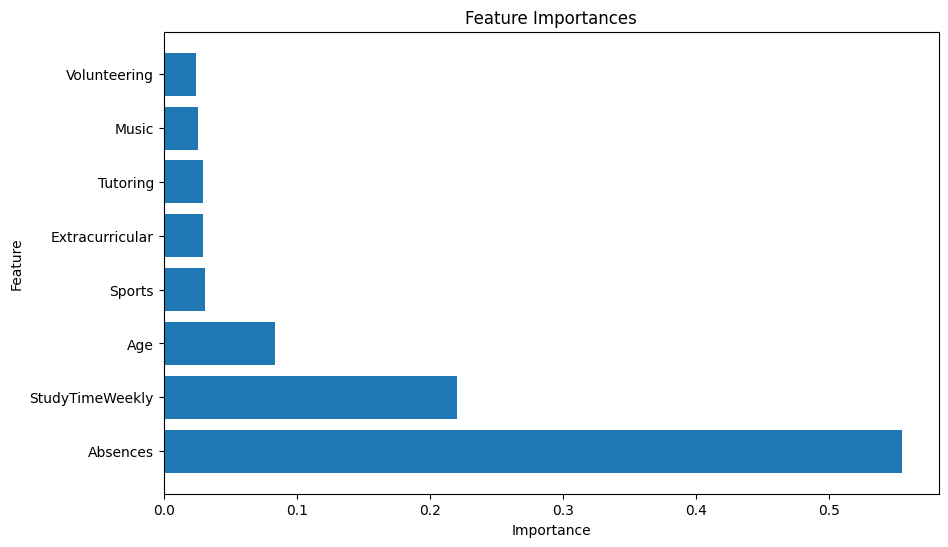

In [7]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [12]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.42      0.23      0.29        22
           1       0.40      0.39      0.40        49
           2       0.46      0.46      0.46        85
           3       0.50      0.49      0.49        86
           4       0.85      0.90      0.87       237

    accuracy                           0.66       479
   macro avg       0.53      0.49      0.50       479
weighted avg       0.65      0.66      0.66       479



In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.67849687 0.69311065 0.68410042 0.68410042 0.57112971]
Mean CV Accuracy: 0.6621876119181349


In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Train the model

# Make predictions and calculate probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Probabilities for each class

# Calculate ROC-AUC (for multi-class classification)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-Score:", f1)

ROC-AUC Score: 0.8283571774357202
Weighted F1-Score: 0.6419871295085987


In [17]:
print(model.classes_)  # Should print the unique classes

[0 1 2 3 4]
